# Social Network Ads
## Submitted by : Abel Rasheed
* Here I have experimented by training the data on different supervised learning algorithms to find the best classifier algorithm for the given dataset, ie Social Network Ads.
* Seperate decision boundaries are drawn for each algorithms



## Importing required libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt



In [4]:
#importing logistic regression from scikit-learn
from sklearn.linear_model import LogisticRegression
#importing KNN classifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

### Imporiting tensorflow libraries needed for deep Learning

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam

### Importing DecisionTree class that is written from scratch

In [6]:
from decision_tree_scratch import DecisionTree

### Loading the dataset into a pandas dataframe

In [7]:
df = pd.read_csv("social_ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Feeding the values of X and y into numpy arrays

In [8]:
X = df.iloc[:,2:4].values
y = df.iloc[:,-1].values

### Splitting the data into train and test datasets, for training and testing the data

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

### Scaling the data so as to perform efficiently and acurately, for the differently parameters need to be on scale for the algorithm to perform accurately

In [10]:
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)

In [12]:
X_test = scaler.fit_transform(X_test)

## Here we start creating a mesh grid that is, mapping the plot into  an array to draw the decision boudaries for different classifier functions

In [13]:
inp1 = np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=.01)

In [14]:
inp2 = np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,step=.01)

In [15]:
XX,YY = np.meshgrid(inp1,inp2)

In [16]:
mesh = np.array([XX.ravel(),YY.ravel()]).T

# Here we start experimenting by training the training data on various classifiers

## 1. Logistic Regression

In [17]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [18]:
predictions = clf.predict(X_test)

In [19]:
accuracy = sum(predictions == y_test)/len(y_test)
accuracy

0.7875

In [20]:
out = clf.predict(mesh)
len(out)

358785

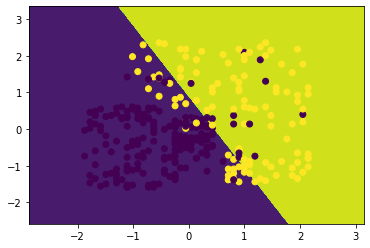

In [21]:
plt.contourf(XX,YY,out.reshape(XX.shape))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

## 2. K Nearest Neighbours

In [22]:
knn = KNeighborsClassifier(n_neighbors=17)

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [24]:
out = knn.predict(mesh)

(358785,)


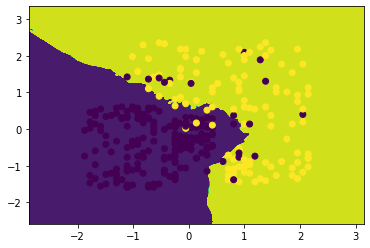

In [25]:
print(out.shape)
plt.contourf(XX,YY,out.reshape(XX.shape))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

## Deep Learning Network using Keras

In [26]:
model = Sequential([
    Dense(units=16, input_shape=(2,), activation='relu'),
    Dense(units=32, activation='relu'),
#      Dense(units=16,activation='relu'),
    Dense(units=8, activation='softmax')
    ])
    
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
model.fit(x=X_train, y=y_train, batch_size=10, epochs=250, verbose=2)

Epoch 1/250
32/32 - 1s - loss: 2.2684 - accuracy: 0.0875
Epoch 2/250
32/32 - 0s - loss: 2.2197 - accuracy: 0.1469
Epoch 3/250
32/32 - 0s - loss: 2.1733 - accuracy: 0.1594
Epoch 4/250
32/32 - 0s - loss: 2.1289 - accuracy: 0.1813
Epoch 5/250
32/32 - 0s - loss: 2.0855 - accuracy: 0.2094
Epoch 6/250
32/32 - 0s - loss: 2.0434 - accuracy: 0.2188
Epoch 7/250
32/32 - 0s - loss: 2.0023 - accuracy: 0.2438
Epoch 8/250
32/32 - 0s - loss: 1.9607 - accuracy: 0.2594
Epoch 9/250
32/32 - 0s - loss: 1.9199 - accuracy: 0.2719
Epoch 10/250
32/32 - 0s - loss: 1.8785 - accuracy: 0.3000
Epoch 11/250
32/32 - 0s - loss: 1.8369 - accuracy: 0.3344
Epoch 12/250
32/32 - 0s - loss: 1.7943 - accuracy: 0.3812
Epoch 13/250
32/32 - 0s - loss: 1.7514 - accuracy: 0.4187
Epoch 14/250
32/32 - 0s - loss: 1.7079 - accuracy: 0.4375
Epoch 15/250
32/32 - 0s - loss: 1.6636 - accuracy: 0.4781
Epoch 16/250
32/32 - 0s - loss: 1.6192 - accuracy: 0.5094
Epoch 17/250
32/32 - 0s - loss: 1.5742 - accuracy: 0.5625
Epoch 18/250
32/32 - 0s

Epoch 142/250
32/32 - 0s - loss: 0.2371 - accuracy: 0.9125
Epoch 143/250
32/32 - 0s - loss: 0.2365 - accuracy: 0.9094
Epoch 144/250
32/32 - 0s - loss: 0.2362 - accuracy: 0.9125
Epoch 145/250
32/32 - 0s - loss: 0.2358 - accuracy: 0.9125
Epoch 146/250
32/32 - 0s - loss: 0.2352 - accuracy: 0.9125
Epoch 147/250
32/32 - 0s - loss: 0.2350 - accuracy: 0.9125
Epoch 148/250
32/32 - 0s - loss: 0.2344 - accuracy: 0.9094
Epoch 149/250
32/32 - 0s - loss: 0.2339 - accuracy: 0.9125
Epoch 150/250
32/32 - 0s - loss: 0.2336 - accuracy: 0.9125
Epoch 151/250
32/32 - 0s - loss: 0.2336 - accuracy: 0.9125
Epoch 152/250
32/32 - 0s - loss: 0.2330 - accuracy: 0.9125
Epoch 153/250
32/32 - 0s - loss: 0.2324 - accuracy: 0.9125
Epoch 154/250
32/32 - 0s - loss: 0.2324 - accuracy: 0.9094
Epoch 155/250
32/32 - 0s - loss: 0.2317 - accuracy: 0.9125
Epoch 156/250
32/32 - 0s - loss: 0.2315 - accuracy: 0.9125
Epoch 157/250
32/32 - 0s - loss: 0.2310 - accuracy: 0.9125
Epoch 158/250
32/32 - 0s - loss: 0.2306 - accuracy: 0.91

In [27]:
y_pred = model.predict(mesh)
out = np.argmax(y_pred,axis=-1)

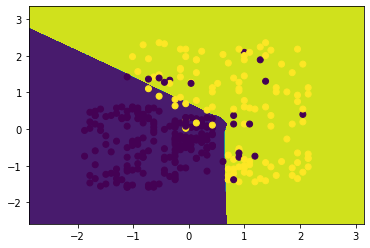

In [28]:
plt.contourf(XX,YY,out.reshape(XX.shape))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

## Decision Tree classifier written from scratch

In [29]:
own_tree = DecisionTree(max_depth=8,n_feats=2)

In [30]:
own_tree.fit(X_train,y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1]
[1 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 1]
[0 0 0 0 0 0]
[1]
[0 0 0]
[1 1 1 1 1 1 1 1 1 1]
[0]
[1 0 0]
[0 1 1 0]
[1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1]
[0]
[1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1]
[0]
[1 1 1]
[1]
[0 0 0]
[1 1 1]
[0 0]
[1]
[0]
[1 1 1 1 1 1 1 1 1 1]
[0]
[1 1 1 1]
[0 0 1 1 1 1 1]
[1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1]
[0]
[1 1]
[1 1 1 1 1 1]


In [31]:
out = own_tree.predict(mesh)

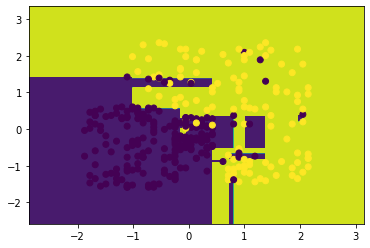

In [32]:
plt.contourf(XX,YY,out.reshape(XX.shape))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

## The accuracy of the Decision Tree model

In [33]:
y_pred = own_tree.predict(X_test)
accuracy = sum(y_test==y_pred)/len(y_test)
accuracy

0.875